# 2장 코드 따라하기

## 2.3.1 예제에 사용할 dataset

### - forge dataset은 인위적으로 만든 이진 분류 dataset입니다.

In [1]:
# %load basic.py
from IPython.display import display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


X.shape : (26, 2)


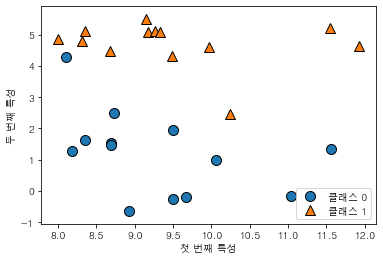

In [2]:
# dataset을 만듭니다.
X, y = mglearn.datasets.make_forge()

# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape :", X.shape)
plt.show();

### - wave dataset은 회귀 알고리즘 설명을 위해 인위적으로 만든 dataset입니다.

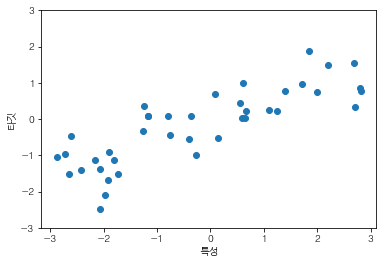

In [3]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show();

### - 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys :\n", cancer.keys())

cancer.keys :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("유방암 데이터의 형태 :", cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


In [6]:
print("클래스별 샘플 갯수 :\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수 :
 {'malignant': 212, 'benign': 357}


malignant는 악성, benign은 양성

In [7]:
print("특성 이름 :\n", cancer.feature_names)

특성 이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### - 1970년대 보스턴 주택가격 dataset (회귀)

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 :", boston.data.shape)

데이터의 형태 : (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape :", X.shape)

X.shape : (506, 104)


## 2.3.2 k-최근접 이웃 ( KNN 알고리즘 )

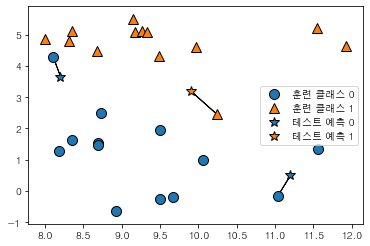

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 연결

-> 1-최근접 이웃 알고리즘의 예측은 같은색으로 연결한 포인트

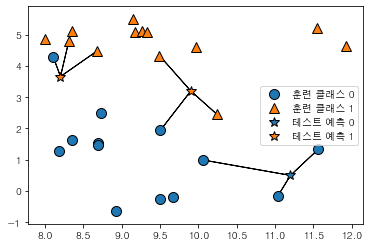

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 3개와 연결

-> 3-최근접 이웃 알고리즘의 예측은 1-최근접 이웃알고리즘의 예측결과와 다른 별 포인트가 생김!!

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


### KNeighborsClassifier 분석

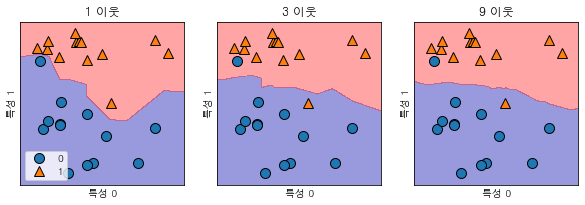

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n, ax in zip([1, 3, 9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)
plt.show();

이웃의 수를 늘릴수록 결정 경계는 부드러워진다  ->  단순한 모델 (복잡도가 낮아짐)

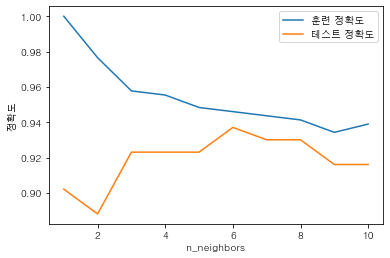

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
n_settings = range(1, 11)
for n in n_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_settings, training_accuracy, label = "훈련 정확도")
plt.plot(n_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

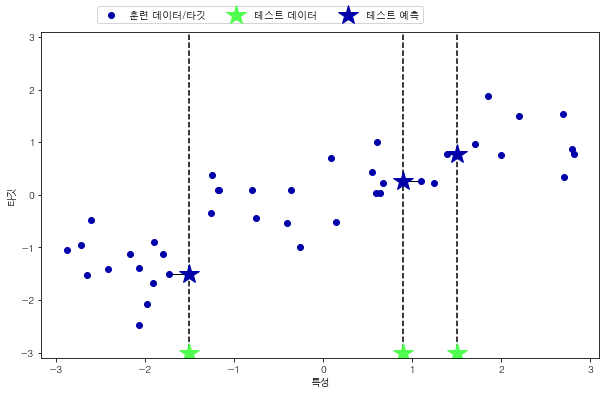

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 타깃값과 연결

-> 1-최근접 이웃 알고리즘의 예측은 그냥 가장 가까운 타깃값

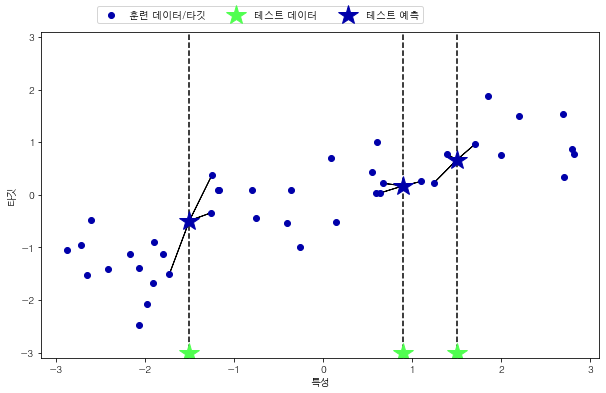

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 3개의 타깃값과 연결

-> 3-최근접 이웃 알고리즘의 예측은 3개의 가장 가까운 타깃값의 평균!!

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave dataset을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [22]:
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


결정 계수 R^2값은 보통 0과 1사이의 값
- 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값의 평균으로만 예측한 경우
- 음수값은 예측과 타깃이 상반된 경향을 가지는 경우

In [23]:
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


### KNeighborsRegressor 분석

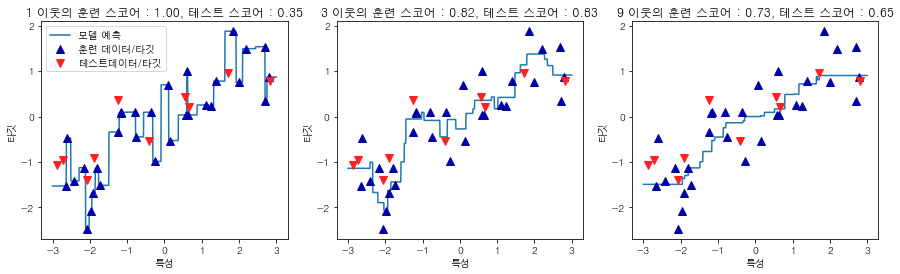

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# -3과 2 사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1, 3, 9], axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors = n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f}, 테스트 스코어 : {:.2f}".format(n, reg.score(X_train, y_train),
                                                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트데이터/타깃"], loc = "best")

이웃을 많이 사용하면 훈련데이터는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 됩니다.

#### KNeighbors 분류기에 중요한 매개변수는 두 개!!
- 데이터 포인트 사이의 거리를 재는 방법 : 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식 사용
- 이웃의 수

## 2.3.3 선형 모델

### 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


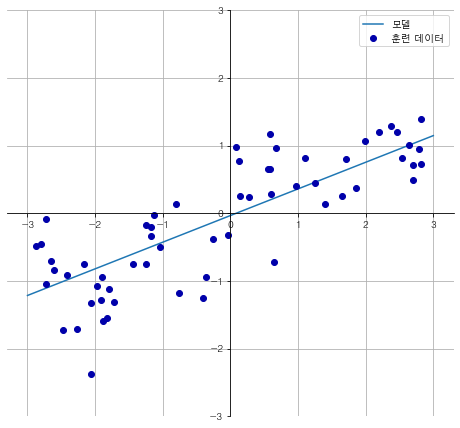

In [25]:
mglearn.plots.plot_linear_regression_wave()

특성이 많은 dataset이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다.  
특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련세트에 대해서) 선형 함수로 모델링할 수 있습니다.

### 선형 회귀 (최소제곱법)

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef_ :", lr.coef_)               # 기울기 - Numpy 배열
print("lr.intercept_ :", lr.intercept_)     # 절편

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [28]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


훈련 세트와 테스트 세트의 R^2 점수가 매우 비슷한 것은 과소적합 상태를 의미합니다

In [29]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


고차원 dataset에서는 선형 모델의 성능이 매우 높아져 과대적합이 일어날 수 있습니다.  
훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과적합되었다는 확실한 신호입니다.

### 리지(Ridge) 회귀

리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용합니다.  
가중치 w의 모든 원소가 0에 가깝게 (모든 특성이 출력에 주는 영향을 최소한으로) 규제로 제한합니다.  
리지 회귀에 사용하는 규제 방식은 L2 규제!!

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


테스트 세트에 대한 점수는 LinearRegression보다 높습니다.  
-> 과대적합이 적고 일반화된 모델이 된다는 의미!  
alpha값을 높이면 계수를 0에 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있습니다.

In [32]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


alpah값을 줄이면 계수에 대한 제약이 풀려서 너무 일반화된 모델이 됩니다.  
(LinearRegression 모델과 거의 같아집니다.)

In [33]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


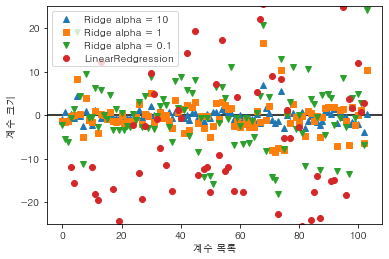

In [34]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRedgression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

보스턴 주택가격 데이터셋에 대한 리지 회귀와 선형 회귀의 학습 곡선

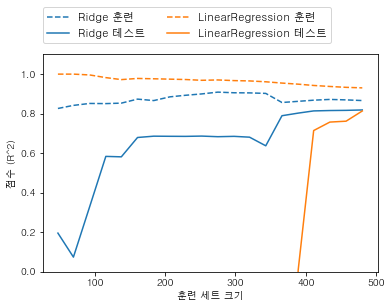

In [35]:
mglearn.plots.plot_ridge_n_samples()

- 데이터가 많아질수록 두 모델의 성능은 좋아지고 마지막에 선형 회귀가 리지 회귀를 따라잡습니다.  
(데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것입니다.)  
- 선형 회귀의 훈련 데이터 성능이 감소하는 것은 데이터가 많아질수록 모델이 과대적합하기 어려워지기 때문입니다.

### 라소 (Lasso)

라소는 리지와 마찬가지로 계수를 0에 가깝게 만들지만 방식이 조금 달라 L1규제라고 합니다.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 갯수 : 4


In [37]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 갯수 : 33


In [38]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 갯수 : 96


alpha값을 낮추면 모델의 복잡도는 증가하여 성능이 좋아지지만  
너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해집니다.

Text(0, 0.5, '계수 크기')

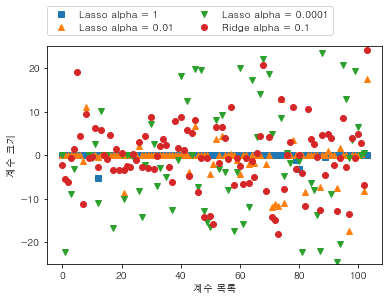

In [39]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05));
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

보통은 리지 회귀를 선호하지만 특성이 많고 그 중 일부만 중요하다면 Lasso가 더 좋은 선택일 수 있습니다.  
또한 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어줍니다.  
scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공합니다. (L1, L2 규제를 위한 매개변수 두 개를 조정해야 함)

### 분류용 선형 모델

분류형 선형 모델에서는 **결정경계**가 입력의 선형 함수입니다.  
-> 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기입니다.

#### 선형 모델을 학습시키는 알고리즘  
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

#### 가장 널리 알려진 두 개의 선형 분류 알고리즘
- 로지스틱 회귀(Logistic Regression) : linear_model.LogisticRegression
- 서포트 벡터 머신(SVM) : svm.LinearSVC

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


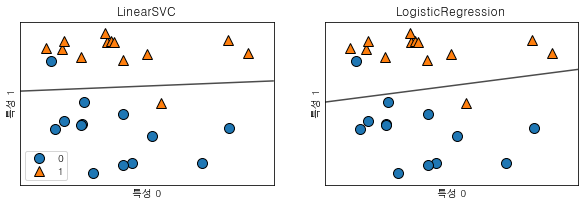

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax = ax, alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend();

Logistic Regression과 SVM은 기본적으로 **L2**를 사용합니다.  
규제의 강도를 결정하는 매개변수는 **C**입니다. C의 값이 높아지면 규제는 감소합니다.  
알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면,  
C의 값을 높이면 개개의 데이터 포인트를 정확히 분휴하려고 노력할 것입니다.

**LinearSVC를 사용한 예**

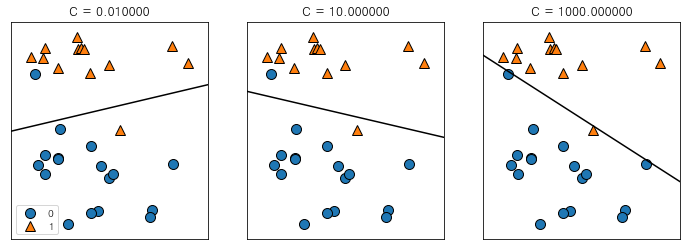

In [41]:
mglearn.plots.plot_linear_svc_regularization()

1. 왼쪽 그림은 아주 작은 C값 때문에 규제가 많이 적용되었습니다.  
-> 비교적 수평에 가까운 결정 경계를 만들었고 잘못 분류한 데이터 포인트는 두 개입니다.  
2. 중간 그림은 왼쪽보다는 C값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌습니다.  
3. 오른쪽 그림은 C값이 아주 커져 결정 경계는 더 기울었습니다.  
-> 클래스 0의 모든 데이터 포인트를 올바로 분류하였지만 클래스 1의 포인트 하나는 여전히 잘못 분류되었습니다.  
-> 모든 데이터 포인트를 정확하게 분류하려고 애썼지만 클래스의 전체적인 배티를 잘 파악하지 못하였습니다. (과대적합된 것 같습니다.)

#### (1) 기본값 C = 1

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.958


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


정확도가 95%로 성능이 좋지만 훈련 세트와 테스트 세트의 정확도가 거의 같으므로 과소적합인 것 같습니다.

#### (2) C = 100  
C가 1일 때보다 모델의 제약이 더 풀렸고 복잡도가 높아졌습니다.

In [43]:
logreg100 = LogisticRegression(C = 100).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.972
테스트 세트 점수 : 0.965


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


복잡도가 높은 모델일 수록 성능이 좋음을 말해줍니다.

#### (3) C = 0.01  
C가 1일 때보다 규제가 더 강해졌습니다.

In [44]:
logreg001 = LogisticRegression(C = 0.01).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


과소적합된 모델이기 때문에 기본 매개변수일 때보다 정확도가 더 낮아집니다.

#### 유방암 dataset에 각기 다른 C 값을 사용하여 만든 로지스틱 회귀의 계수

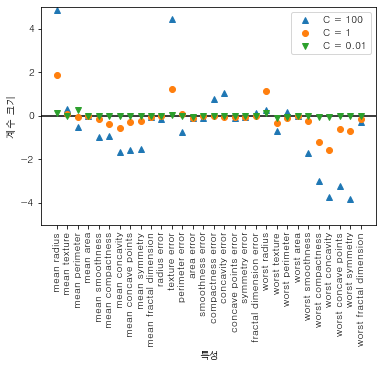

In [45]:
plt.plot(logreg100.coef_.T, '^', label = "C = 100")
plt.plot(logreg.coef_.T, 'o', label = "C = 1")
plt.plot(logreg001.coef_.T, 'v', label = "C = 0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend();

#### 더 이해하기 쉽게 L1규제를 사용한 분류 정확도와 계수 그래프

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C = 0.001인 L1 로지스틱 회귀의 훈련 정확도 : 0.91
C = 0.001인 L1 로지스틱 회귀의 테스트 정확도 : 0.92


C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C = 1.000인 L1 로지스틱 회귀의 훈련 정확도 : 0.96
C = 1.000인 L1 로지스틱 회귀의 테스트 정확도 : 0.96
C = 100.000인 L1 로지스틱 회귀의 훈련 정확도 : 0.99
C = 100.000인 L1 로지스틱 회귀의 테스트 정확도 : 0.98


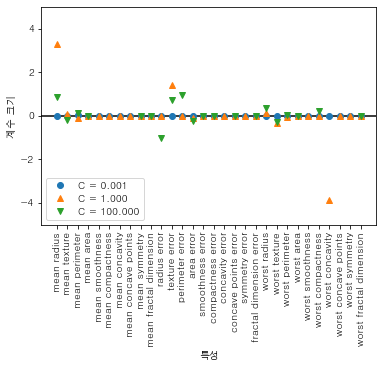

In [46]:
for c, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C = c, penalty = "l1").fit(X_train, y_train)
    print("C = {:.3f}인 L1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(c, lr_l1.score(X_train, y_train)))
    print("C = {:.3f}인 L1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(c, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label = "C = {:.3f}".format(c))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc = 3);

### 다중 클래스 분류용 선형 모델

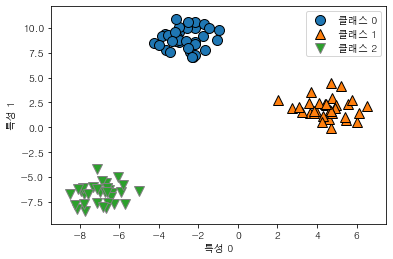

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"]);

이 dataset은 2차원이며 각 클래스의 데이터는 정규분포(가우시안 분포)를 따릅니다.

In [48]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 :", linear_svm.coef_.shape)
print("절편 배열의 크기 :", linear_svm.intercept_.shape)  # 1차원 벡터

계수 배열의 크기 : (3, 2)
절편 배열의 크기 : (3,)


#### 세 개의 분류기가 만드는 경계 시각화

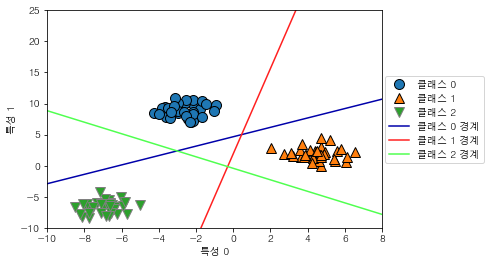

In [49]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 25)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc = (1.01, 0.3));

그림 중앙의 삼각형 영역은 세 분류기 모두 나머지로 분류했습니다.  
이 곳의 데이터 포인트는 분류 공식의 결과가 가장 높은 클래스(가장 가까운 직선의 클래스)로 분류될 것입니다.

#### 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계

Text(0, 0.5, '특성 1')

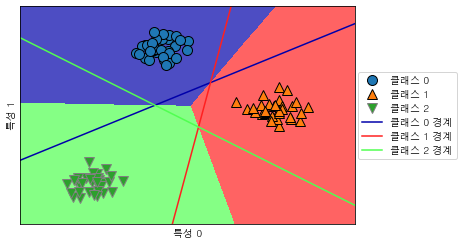

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc = (1.01, 0.3));
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 장단점과 매개변수

선형 모델의 주요 매개변수  
- 회귀 모델 : **alpha**
- LinearSVC와 LogisticRegression : **C**

**alpha**값이 클수록, **C**값이 작을수록 모델이 단순해집니다.  
1. 보통 C와 alpha는 로그 스케일(10배씩)로 최적치를 정합니다.
2. L1 규제를 사용할지 L2 규제를 사용할지 정합니다.
    - 중요한 특성이 많지 않다면 **L1**
    - 기본적으로는 **L2**

선형 모델의 장점  
1. 학습 속도와 예측이 빠릅니다.
2. 매우 큰 dataset과 희소한 dataset 둘 다 잘 작동합니다.
3. 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있습니다.  
    (**but!!** dataset의 특성들이 서로 깊게 연관되어 있을 때 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있습니다.)  
4. 샘플에 비해 특성이 많을 때 잘 작동합니다.  
    (**but!!** 저차원의 dataset에서는 다른 모델들의 일반화 성능이 더 좋습니다.)

## 2.3.4 나이브 베이즈 분류기

**나이브 베이즈(naive bayes) 분류기**는  
각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문에 선형 모델과 매우 유사합니다.  
- scikit-learn에 구현된 나이브 베이즈 분류기는 **GaussianNB, BernoulliNB, MultinomiaNB** 세 가지입니다.  
- GaussianNB는 연속적인 어떤 데이터에도 적용할 수 있고 BernoulliNB는 이진데이터, MultinomiaNB는 카운터 데이터에 적용됩니다.  
- BernoulliNB과 MultinomiaNB는 대부분 텍스트 데이터를 분류할 때 사용합니다.  
- BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셉니다.  
- MultinomiaNB는 클래스별로 특성의 평균을 계산합니다.  
- GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장합니다.

#### BernoulliNB 분류기의 예시

In [51]:
X = np.array([[0, 1, 0, 1], [1, 0, 1, 1], [0, 0, 0, 1], [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [52]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis = 0)
print("특성 카운트 :\n", counts)

특성 카운트 :
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomiaNB와 BernoulliNB의 예측 공식은 선형 모델과 같지만 나이브 베이즈 모델의 coef_는 기울기 w가 아니라서 의미가 다릅니다.

### 장단점과 매개변수

MultinomiaNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가집니다.  
alpha가 크면 통계 데이터를 더 완만하게 만들고 모델의 복잡도는 낮아집니다.  
(alpha값이 성능 향상에 크게 기여하지 않지만 어느 정도 정확도를 높일 수 있습니다.)

GaussianNB는 대부분 매우 고차원 dataset에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트같은 희소한 데이터를 카운트하는데 사용합니다.  
(MultinomiaNB는 보통 0이 아닌 특성이 많은 dataset에서 BernoulliNB보다 성능이 높습니다.)  

나이브 베이즈 모델의 장단점은 선형 모델과 비슷합니다.  
1. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽습니다.
2. 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않습니다.  
3. **선형 모델로는 학습시간이 너무 오래 걸리는 매우 큰 dataset에는 나이브 베이즈 모델을 시도해볼 만하여 종종 사용됩니다.**

## 2.3.5 결정 트리

In [53]:
# module 'graphviz' has no attribute 'Digraph' 에러 해결 후 다시 실행
# Image data of dtype object cannot be converted to float 라는 새로운 에러 발생
# mglearn.plots.plot_animal_tree()

### 결정 트리의 복잡도 제어하기

과대 적합을 막는 전략은 크게 두 가지입니다.  
- 트리 생성을 일찍 중단하는 전략 (사전 가지치기 pre-pruning)  
    (트리의 최대 깊이나 리프의 최대 갯수를 제한하거나 노드가 분할하기 위한 포인트의 최소 갯수를 지정)
- 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략 (사후 가지치기 post-pruning, 가지치기 pruning)

scikit-learn에서의 결정 트리 : DecisionTreeRegressor, DecisionTreeClassifier  
-> 사전 가지치기만 지원합니다.

In [54]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.937


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있습니다.  
-> 가지치기를 하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않습니다.  

In [55]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 점수 : 0.988
테스트 세트 점수 : 0.951


훈련 세트의 정확도는 떨어졌지만 테스트 세트의 성능은 개선되었습니다.

### 결정 트리 분석

In [56]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ["악성", "양성"],
               feature_names = cancer.feature_names, impurity = False, filled = True)

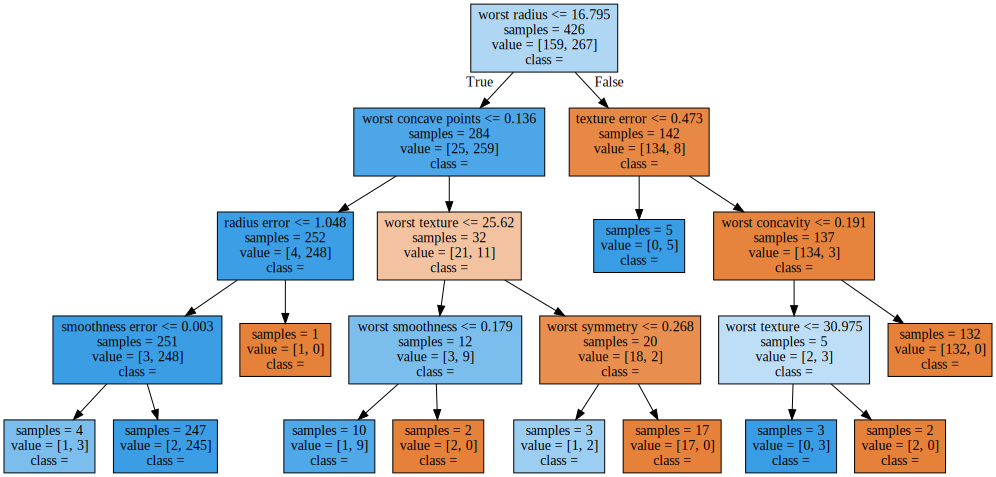

In [57]:
import graphviz

with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도

In [59]:
print("특성 중요도 : \n", tree.feature_importances_)

특성 중요도 : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 **특성 중요도**입니다.  
0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다.  
**특성 중요도의 전체 합은 1입니다.**

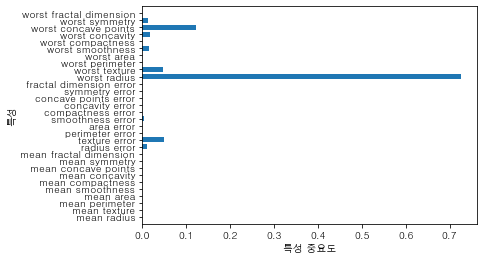

In [61]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree);

feature_importances_값이 낮다고 해서 유용하지 않은 특성이라는 뜻은 아닙니다.  
단지, 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.

#### y축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 dataset과 결정 트리가 만든 결정 경계와 트리

Feature importances: [0. 1.]


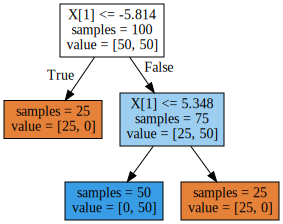

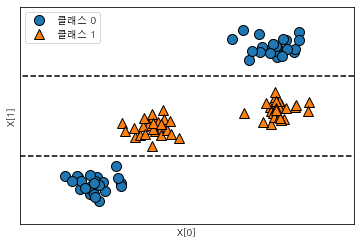

In [64]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

DecisionTreeRegressor(그리고 모든 다른 트리 기반 회귀 모델)는 외삽extrapolation,  
즉 **훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없습니다.**

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


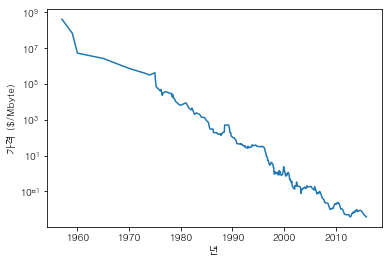

In [68]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)");

In [70]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


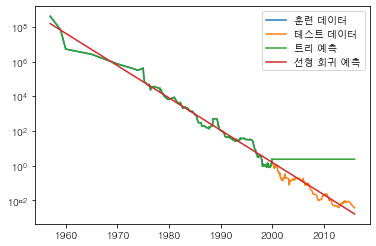

In [75]:
plt.semilogy(data_train.date, data_train.price, label = "훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label = "테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label = "트리 예측")
plt.semilogy(ram_prices.date, price_lr, label = "선형 회귀 예측")
plt.legend();

### 장단점과 매개변수

결정 트리에서 모델 복잡도를 조절하는 매개변수는 사전 가지치기 매개변수입니다.  
max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분합니다.

결정 트리가 앞의 다른 알고리즘보다 나은 점  
1. 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽습니다.(비교적 작은 트리일 때)
2. 데이터의 스케일에 구애받지 않습니다.
3. 특성의 정규화나 표준화 같은 전처리 과정이 필요 없습니다.  
    (**why?** 각 특성이 개별적으로 처리되어 있어 데이터를 분할하는 데 데이터 스케일의 영향을 받지 않으므로)  
    -> 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동!!

결정 트리의 주요 단점  
사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않습니다.  
-> 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용합니다.

## 2.3.6 결정 트리의 앙상블

**앙상블**ensemble은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다.  
(앙상블 모델이 분류와 회귀 문제의 다양한 dataset에서 효과적이라고 입증되었습니다.)  
**랜덤 포레스트**와 **그래디언트 부스팅** 결정 트리는 둘 다 모델을 구성하는 기본 요소로 결정 트리를 사용합니다.